### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving.

1. Would you accept that coupon and take a short detour to the restaraunt? 
2. Would you accept the coupon but use it on a sunbsequent trip? 
3. Would you ignore the coupon entirely? 
4. What if the coupon was for a bar instead of a restaraunt? 
5. What about a coffee house? 
6. Would you accept a bar coupon with a minor passenger in the car? 
7. What about if it was just you and your partner in the car? 
8. Would weather impact the rate of acceptance? 
9. What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. 

The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. 

Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  

There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a **brief report** that highlights the differences between customers who did and did not accept the coupons.  

To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. 

You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
 

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [9]:
# Load data
data = pd.read_csv('data/coupons.csv')

In [10]:
# Check data using head() and tail()
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [11]:
# Look at the shape of data
data.shape

(12684, 26)

2. Investigate the dataset for missing or problematic data.

In [12]:
# Look for null values
print(data.isnull())

       destination  passanger  weather  temperature   time  coupon  \
0            False      False    False        False  False   False   
1            False      False    False        False  False   False   
2            False      False    False        False  False   False   
3            False      False    False        False  False   False   
4            False      False    False        False  False   False   
...            ...        ...      ...          ...    ...     ...   
12679        False      False    False        False  False   False   
12680        False      False    False        False  False   False   
12681        False      False    False        False  False   False   
12682        False      False    False        False  False   False   
12683        False      False    False        False  False   False   

       expiration  gender    age  maritalStatus  ...  CoffeeHouse  CarryAway  \
0           False   False  False          False  ...        False       True   

3. Decide what to do about your missing data -- drop, replace, other...

In [13]:
# Check for null rows
print(data.isnull().any(axis=1))

0        True
1        True
2        True
3        True
4        True
         ... 
12679    True
12680    True
12681    True
12682    True
12683    True
Length: 12684, dtype: bool


In [14]:
# passanger column is not spelled correctly, fix it
data = data.rename(columns={"passanger": "passenger"})

In [15]:
# car column has a series of rows with NaN and will be replaced with False (0)
print(data.iloc[0])
print(data.iloc[12683])

# Seems like the car attribute is NaN and since we know that coupons are given
# to people driving in car then we can drop that column
data = data.drop(columns=["car"])

destination                      No Urgent Place
passenger                                  Alone
weather                                    Sunny
temperature                                   55
time                                         2PM
coupon                           Restaurant(<20)
expiration                                    1d
gender                                    Female
age                                           21
maritalStatus                  Unmarried partner
has_children                                   1
education               Some college - no degree
occupation                            Unemployed
income                           $37500 - $49999
car                                          NaN
Bar                                        never
CoffeeHouse                                never
CarryAway                                    NaN
RestaurantLessThan20                         4~8
Restaurant20To50                             1~3
toCoupon_GEQ5min    

In [16]:
# CarryAway column has a series of rows with NaN and will be replaced with False (0)
print(data.iloc[0])
print(data.iloc[12679])

data['CarryAway'] = data['CarryAway'].fillna(0)
print(data.isnull().any(axis=1))

destination                      No Urgent Place
passenger                                  Alone
weather                                    Sunny
temperature                                   55
time                                         2PM
coupon                           Restaurant(<20)
expiration                                    1d
gender                                    Female
age                                           21
maritalStatus                  Unmarried partner
has_children                                   1
education               Some college - no degree
occupation                            Unemployed
income                           $37500 - $49999
Bar                                        never
CoffeeHouse                                never
CarryAway                                    NaN
RestaurantLessThan20                         4~8
Restaurant20To50                             1~3
toCoupon_GEQ5min                               1
toCoupon_GEQ15min   

In [19]:
# Final sanity check looking at head()
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0


In [18]:
# look at tail()
data.tail()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


4. What proportion of the total observations chose to accept the coupon? 



In [20]:
# Sum up total yes and no
total = data.shape[0]
yes = data[["Y"]].eq(1).all(1).sum()
no = data[["Y"]].eq(0).all(1).sum()

# Compute percentages
yes_percent = (yes/total)
no_percent = (no/total)

# Print totals and percentages
print("Total:" + str(total) + " yes:" + str(yes) + " and no:" + str(no) + "")
print(" ===> "+ f"{yes_percent:.2%}" + " % yeses and " + f"{no_percent:.2%}" + "% nos")

Total:12684 yes:7210 and no:5474
 ===> 56.84% % yeses and 43.16%% nos


5. Use a bar plot to visualize the `coupon` column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



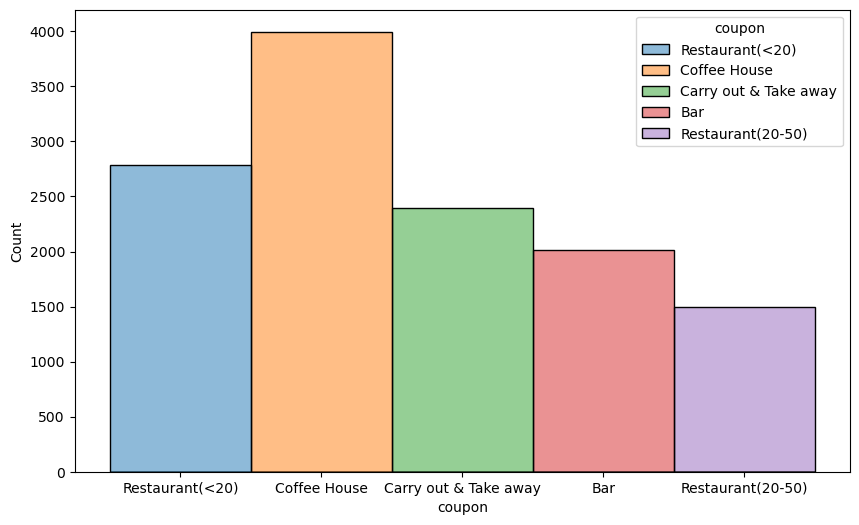

In [31]:
# Simple bar plot of coupons and size it to be able to see all coupon types
plt.subplots(figsize=(10, 6))
plot = sns.histplot(data, x="coupon", hue="coupon")

# Save figure as images/coupon-column.jpg
fig = plot.get_figure()
fig.savefig("images/coupon-column-bar-plot.png")

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



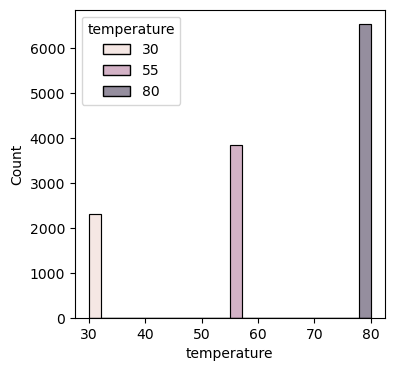

In [32]:
plt.subplots(figsize=(4, 4))
plot = sns.histplot(data, x="temperature", hue="temperature")

# Save figure as images/coupon-column.jpg
fig = plot.get_figure()
fig.savefig("images/temperature-column-histogram.png")

2. What proportion of bar coupons were accepted?


In [33]:
bar_coupon = data.query('coupon == "Bar"')
bar_coupon_accepted = data.query('coupon == "Bar" & Y == 1')
print("Percentage of Bar coupons accepted is: " + f"{(bar_coupon_accepted.size/bar_coupon.size):.2%}")

Percentage of Bar coupons accepted is: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Percentage of Bar coupons accepted who goes to a bar 3 or fewer tume is: 33.02%
Percentage of Bar coupons accepted who goes to a bar 4 or more time is: 7.59%


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



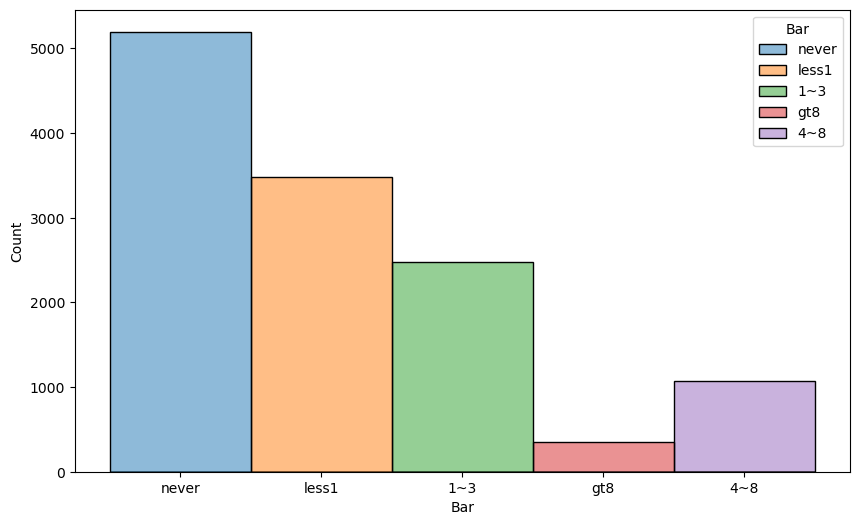

In [34]:
# Show the histogram of the Bar column to see the different entries for that column
plt.subplots(figsize=(10, 6))
sns.histplot(data, x="Bar", hue="Bar")

# Select entries where a bar coupon is accepted
bar_coupon_accepted = data.query('coupon == "Bar" & Y == 1')

# The selection of Bar column where user went to bar 3 times or less
lt_3 = ["never", "less1", "1~3"]
bar_coupon_accepted_lt_3 = bar_coupon_accepted.query('Bar in @lt_3')
print("Percentage of Bar coupons accepted who goes to a bar 3 or fewer tume is: " + f"{(bar_coupon_accepted_lt_3.size/bar_coupon.size):.2%}")

# The selection of Bar column where user went to bar 4 times or more
gt_4 = ["4~8", "gt8"]
bar_coupon_accepted_gt_4 = bar_coupon_accepted.query('Bar in @gt_4')
print("Percentage of Bar coupons accepted who goes to a bar 4 or more time is: " + f"{(bar_coupon_accepted_gt_4.size/bar_coupon.size):.2%}")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Percentage of Bar coupons accepted of drivers age 25+ who goes to a bar 1+ times a month: 71.22%
Percentage of Bar coupons accepted of drivers age <25 who goes to a bar 1+ times a month: 27.80%


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



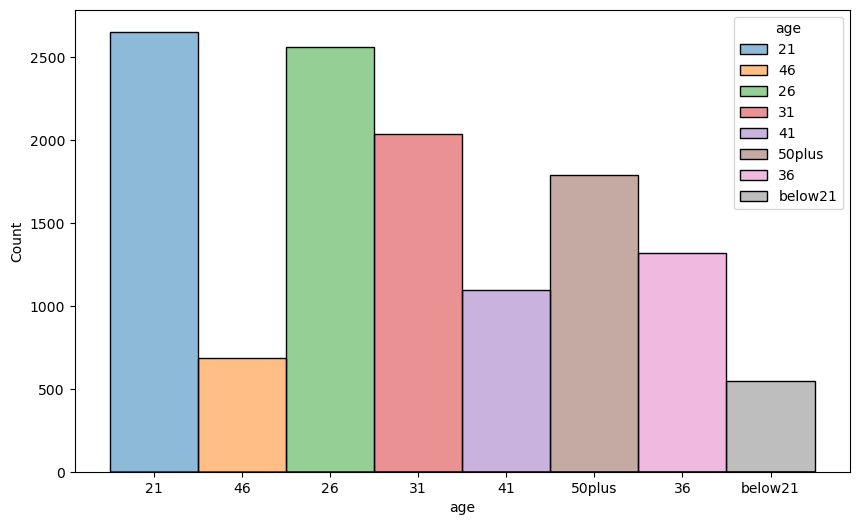

In [35]:
# Show the histogram of the age column to see the different entries for that column
plt.subplots(figsize=(10, 6))
sns.histplot(data, x="age", hue="age")

# The selection of Bar column where user went to bar more than once a month
bar_mt_1_month = ["1~3", "4~8", "gt8"]
coupon_accepted_bar_mt_1_month = bar_coupon_accepted.query('coupon == "Bar" & Bar in @bar_mt_1_month')

# The selection of user's aged over the age of 25
gt_25 = ["26", "31", "36", "41", "46", "50plus"]
coupon_accepted_age25_bar_mt_1_month = coupon_accepted_bar_mt_1_month.query('age in @gt_25')
print("Percentage of Bar coupons accepted of drivers age 25+ who goes to a bar 1+ times a month: " + f"{coupon_accepted_age25_bar_mt_1_month.size/coupon_accepted_bar_mt_1_month.size:.2%}")

# The selection of user's aged over the age 21 or below
lt_25 = ["21", "21below"]
coupon_accepted_other_age_bar_mt_1_month = coupon_accepted_bar_mt_1_month.query('age in @lt_25')
print("Percentage of Bar coupons accepted of drivers age <25 who goes to a bar 1+ times a month: " + f"{coupon_accepted_other_age_bar_mt_1_month.size/coupon_accepted_bar_mt_1_month.size:.2%}")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Percentage of Bar coupons accepted of drivers who goes to a bar 1+ times a month and passenger is kid and who's occupation is farming fishing & forestry: 0.00%
Percentage of Bar coupons accepted of drivers who goes to a bar 1+ times a month and passenger not kid and who's occupation not farming fishing & forestry: 95.85%


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



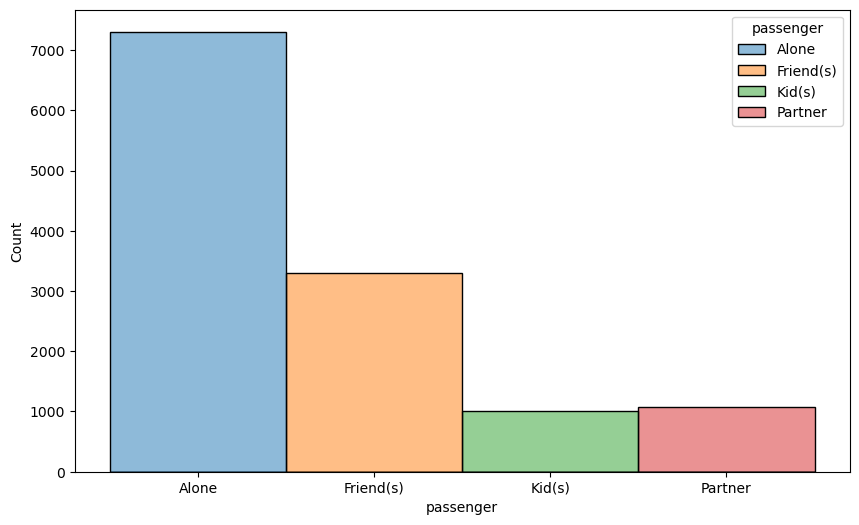

In [39]:
# Show the histogram of the passenger column to see the different entries for that column
plt.subplots(figsize=(10, 6))
sns.histplot(data, x="passenger", hue="passenger")

# Selection of users with passenders not a kid and with occupcation not "Farming Fishing & Forestry"
passengers = ["Alone", "Friend(s)", "Kid(s)", "Partner"]

coupon_accepted_bar_mt_1_month = bar_coupon_accepted.query('coupon == "Bar" & Bar in @bar_mt_1_month')
coupon_accepted_mt_1_month_passenger_with_kid_occupation_is_farming = coupon_accepted_bar_mt_1_month.query('coupon == "Bar" & Bar in @bar_mt_1_month & passenger == "Kid(s)" & occupation == "Farming Fishing & Forestry"')
coupon_accepted_mt_1_month_passenger_not_kid_occupation_not_farming = coupon_accepted_bar_mt_1_month.query('passenger != "Kid(s)" & occupation != "Farming Fishing & Forestry"')

print("Percentage of Bar coupons accepted of drivers who goes to a bar 1+ times a month and passenger is kid and who's occupation is farming fishing & forestry: " + f"{coupon_accepted_mt_1_month_passenger_with_kid_occupation_is_farming.size/coupon_accepted_bar_mt_1_month.size:.2%}")
print("Percentage of Bar coupons accepted of drivers who goes to a bar 1+ times a month and passenger not kid and who's occupation not farming fishing & forestry: " + f"{coupon_accepted_mt_1_month_passenger_not_kid_occupation_not_farming.size/coupon_accepted_bar_mt_1_month.size:.2%}")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Accepted coupon: go to bars more than once a month, had passengers that were not a kid, and were not widowed: 47.52%
Accepted coupon: go to bars more than once a month and are under the age of 30: 23.46%


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



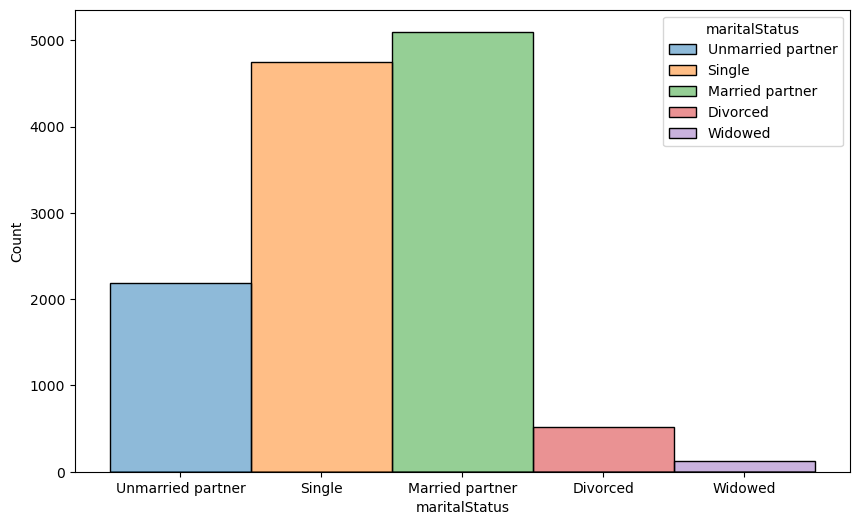

In [249]:
# Show the histogram of the 'maritalStatus' column to see the different entries for that column
plt.subplots(figsize=(10, 6))
sns.histplot(data, x="maritalStatus", hue="maritalStatus")

# Select driver's accepting Bar coupon who 'go to bars more than once a month, had passengers that were not a kid, and were not widowed'
accepted_coupon_go_to_bars_more_than_1_month_with_passengers_not_kid_and_not_widowed = bar_coupon_accepted.query('Bar in @bar_mt_1_month & passenger != "Kid(s)" & maritalStatus != "Widowed"')
print("Accepted coupon: go to bars more than once a month, had passengers that were not a kid, and were not widowed: " + f"{accepted_coupon_go_to_bars_more_than_1_month_with_passengers_not_kid_and_not_widowed.size / bar_coupon_accepted.size:.2%}")

# Select driver's accepting Bar coupon who 'go to bars more than once a month and are under the age of 30 '
under_age30 = ["26", "31"]
accepted_coupon_go_to_bars_more_than_1_month_and_under_age_30 = bar_coupon_accepted.query('Bar in @bar_mt_1_month & age in @under_age30')
print("Accepted coupon: go to bars more than once a month and are under the age of 30: " + f"{accepted_coupon_go_to_bars_more_than_1_month_and_under_age_30.size / bar_coupon_accepted.size:.2%}")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Accepted coupon: accepted_coupon_go_to_cheap_restaurants_mt_4times_month_and_income_lt_50K: 0.00%


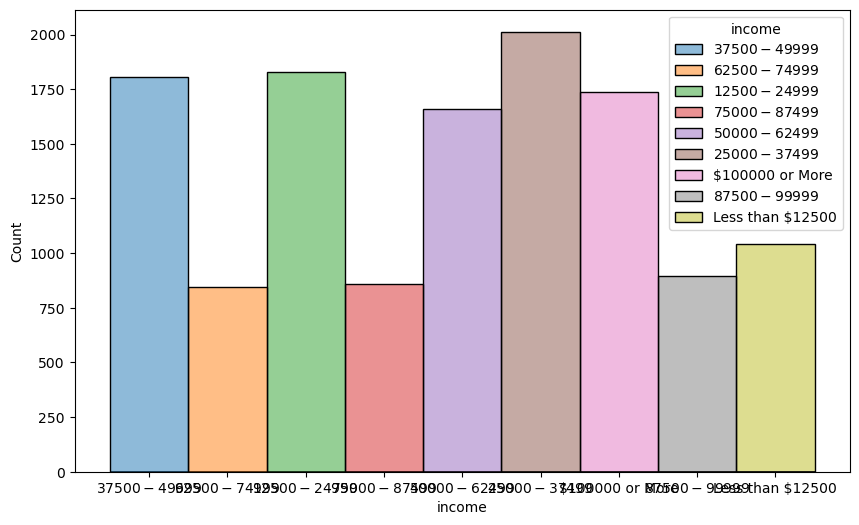

In [40]:
# Show the histogram of the 'income' column to see the different entries for that column
plt.subplots(figsize=(10, 6))
sns.histplot(data, x="income", hue="income")

# Select driver's accepting Bar coupon who 'go to cheap restaurants more than 4 times a month and income is less than 50K'
bar_gt_4_month = ["4~8", "gt8"]
income_lt_50K = "37500 - 49999"
accepted_coupon_go_to_cheap_restaurants_mt_4times_month_and_income_lt_50K = bar_coupon_accepted.query('Bar in @bar_gt_4_month & income == "37500 - 49999"')
print("Accepted coupon: accepted_coupon_go_to_cheap_restaurants_mt_4times_month_and_income_lt_50K: " + f"{accepted_coupon_go_to_cheap_restaurants_mt_4times_month_and_income_lt_50K.size / bar_coupon_accepted.size:.2%}")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [251]:
# 1. Drivers unlikely to accept bar coupon when passenger is a kid
# 2. Drivers who are Farmers Fisherman or Forestry profession are unlikely to accept a Bar coupon
# 2. Drivers likely to accept bar coupon if already going to bar often
# 3. Drivers more likely to accept bar coupon if age 25+

<Axes: >

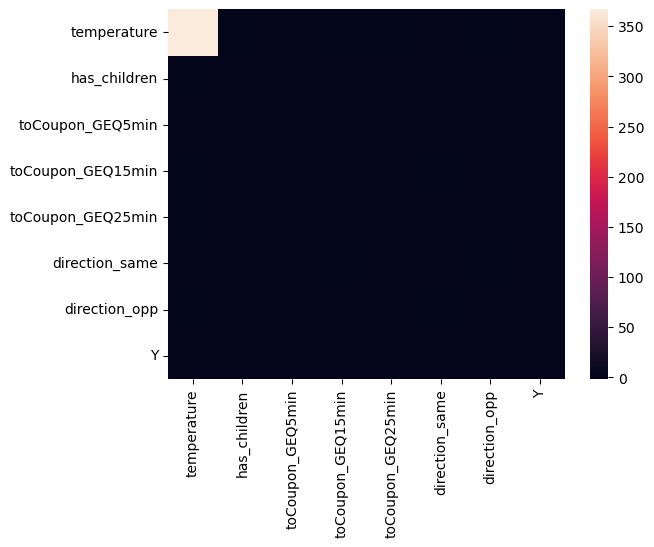

In [252]:
# So many combination that this analysis of trying all the differnt combinations manually will miss a lot. 
# Need a better approach. Perhaps coocurrence analysis or somethign more fundamentals.
# Covariant matrix or cooccurence analysis between coupon accepted and different features
cov = data.cov(numeric_only=True)
sns.heatmap(cov)

# Need to convert categorical data into numeric to include the rest in covariant matrix

<Axes: >

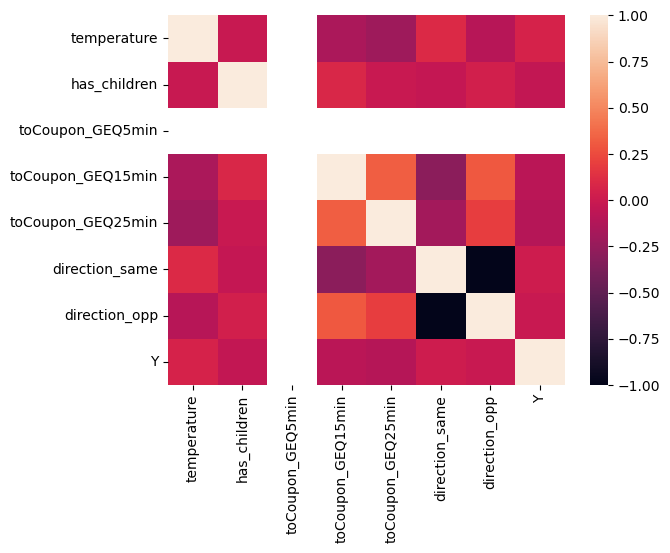

In [253]:
# Correlation matrix
corr = data.corr(numeric_only=True)
sns.heatmap(corr)

# Need to convert categorical data into numeric to include the rest in covariant matrix

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed

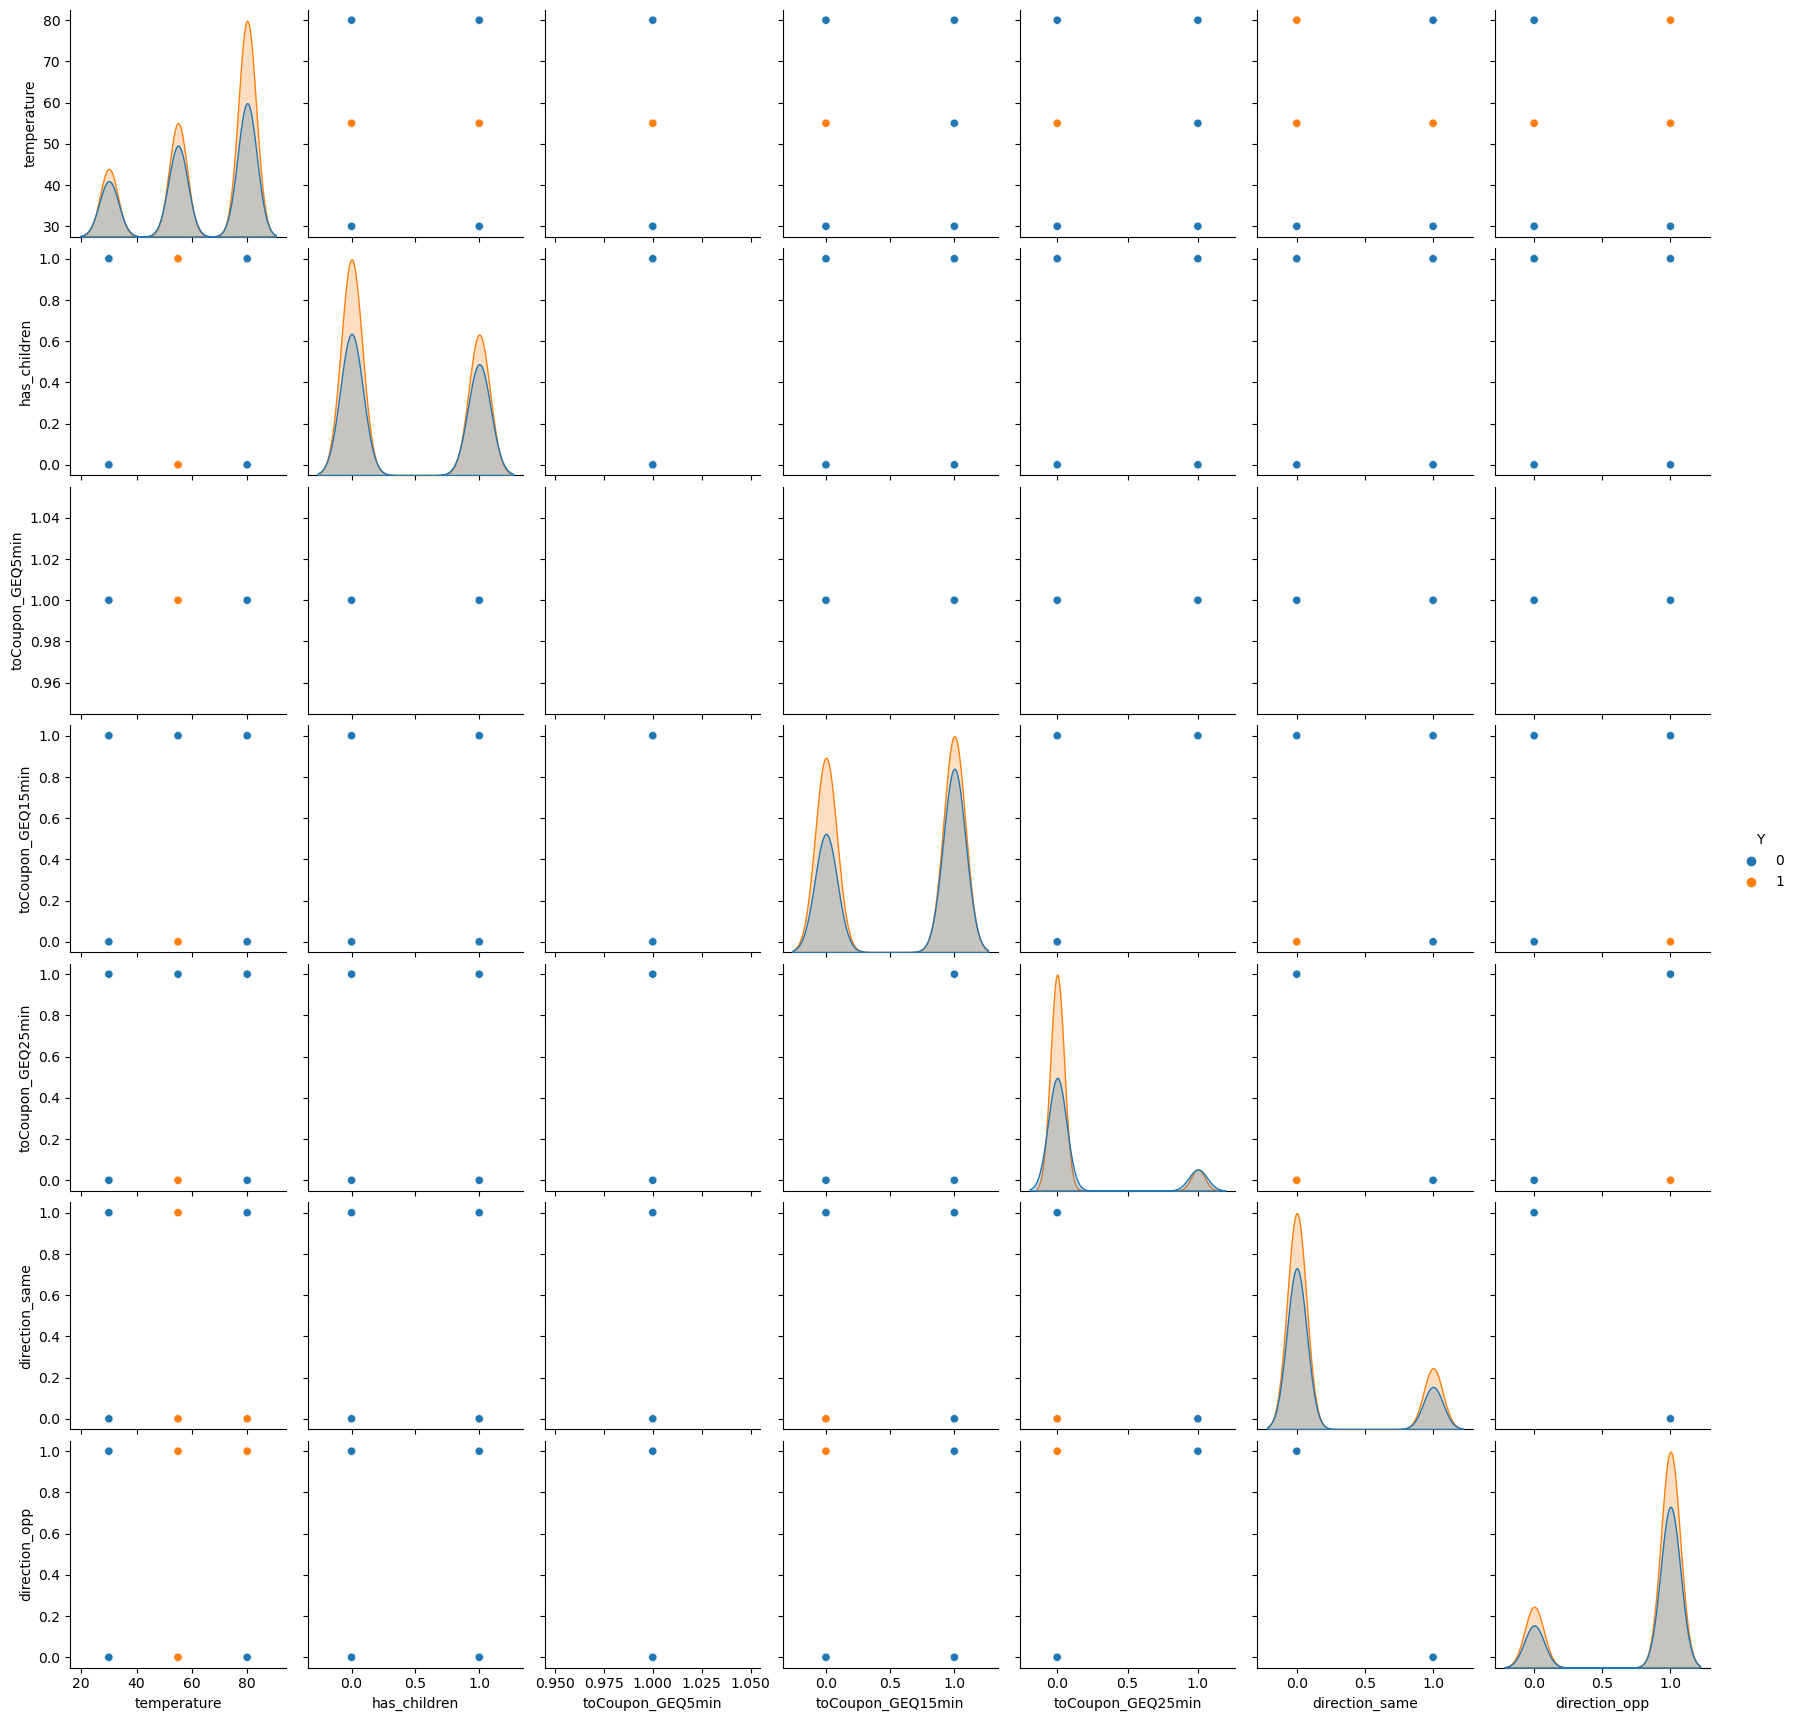

In [48]:
# Try to perform pairplots to find coocurrence of columns
sns.pairplot(data, hue='Y', height=2.5)

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [254]:
# Investigage coupon type "Coffee House"
coupon_type = "Coffee House"

# Compute accepted vs not accepted
accepted_coupons = data.query("Y == 1")
coffee_house_coupon_accepted = data.query('coupon == "Coffee House" & Y == 1')
coffee_house_coupon_not_accepted = data.query('coupon == "Coffee House" & Y == 0')
coffee_house_coupon_total = coffee_house_coupon_accepted.size + coffee_house_coupon_not_accepted.size

print("Coupon type Coffee House: accepted:" + f"{coffee_house_coupon_accepted.size/coffee_house_coupon_total:.2%}" + " and not accepted: " + f"{coffee_house_coupon_not_accepted.size / coffee_house_coupon_total:.2%}")

Coupon type Coffee House: accepted:49.92% and not accepted: 50.08%


In [255]:
# Coffee House coupon and age
ages = ["below21", "21", "26", "31", "36", "41", "46", "50plus"]

ages_mt21 = ["26", "31", "36", "41", "46", "50plus"]
ages_lt21 = ["below21"]

ages_mt31 = ["36", "41", "46", "50plus"]
ages_lt31 = ["below21", "21", "26"]

ages_mt41 = ["46", "50plus"]
ages_lt41 = ["below21", "21", "26", "31", "36"]

print("Coffee House coupon and age: 21")
accepted_coupons_21 = coffee_house_coupon_accepted.query('age == "21"')
accepted_coupons_21less = coffee_house_coupon_accepted.query('age in @ages_lt21')
accepted_coupons_21up = coffee_house_coupon_accepted.query('age in @ages_mt21')
print("==> Coffee House coupon age 21: " + f"{accepted_coupons_21.size / coffee_house_coupon_accepted.size:.2%}")
print("==> Coffee House coupon age 21-: " + f"{accepted_coupons_21less.size / coffee_house_coupon_accepted.size:.2%}")
print("==> Coffee House coupon age 21+: " + f"{accepted_coupons_21up.size / coffee_house_coupon_accepted.size:.2%}")

print("Coffee House coupon and age: 31")
accepted_coupons_31 = coffee_house_coupon_accepted.query('age == "31"')
accepted_coupons_31less = coffee_house_coupon_accepted.query('age in @ages_lt31')
accepted_coupons_31up = coffee_house_coupon_accepted.query('age in @ages_mt31')
print("==> Coffee House coupon age 31: " + f"{accepted_coupons_31.size / coffee_house_coupon_accepted.size:.2%}")
print("==> Coffee House coupon age 31-: " + f"{accepted_coupons_31less.size / coffee_house_coupon_accepted.size:.2%}")
print("==> Coffee House coupon age 31+: " + f"{accepted_coupons_31up.size / coffee_house_coupon_accepted.size:.2%}")

print("Coffee House coupon and age: 41")
accepted_coupons_41 = coffee_house_coupon_accepted.query('age == "41"')
accepted_coupons_41less = coffee_house_coupon_accepted.query('age in @ages_lt41')
accepted_coupons_41up = coffee_house_coupon_accepted.query('age in @ages_mt41')
print("==> Coffee House coupon age 41: " + f"{accepted_coupons_41.size / coffee_house_coupon_accepted.size:.2%}")
print("==> Coffee House coupon age 41-: " + f"{accepted_coupons_41less.size / coffee_house_coupon_accepted.size:.2%}")
print("==> Coffee House coupon age 41+: " + f"{accepted_coupons_41up.size / coffee_house_coupon_accepted.size:.2%}")

Coffee House coupon and age: 21
==> Coffee House coupon age 21: 23.21%
==> Coffee House coupon age 21-: 5.41%
==> Coffee House coupon age 21+: 71.38%
Coffee House coupon and age: 31
==> Coffee House coupon age 31: 14.89%
==> Coffee House coupon age 31-: 50.38%
==> Coffee House coupon age 31+: 34.74%
Coffee House coupon and age: 41
==> Coffee House coupon age 41: 8.17%
==> Coffee House coupon age 41-: 74.69%
==> Coffee House coupon age 41+: 17.14%


In [256]:
# Coffee House coupon and maritalStatus
marital_status = ["Unmarried partner", "Single", "Married partner", "Divorced", "Widowed"]

print("Coffee House coupon and maritalStatus: Unmarried partner")
accepted_coupons_up = coffee_house_coupon_accepted.query('maritalStatus == "Unmarried partner"')
print("==> Coffee House coupon age maritalStatus: Unmarried partner: " + f"{accepted_coupons_up.size / coffee_house_coupon_accepted.size:.2%}")

print("Coffee House coupon and maritalStatus: Single")
accepted_coupons_s = coffee_house_coupon_accepted.query('maritalStatus == "Single"')
print("==> Coffee House coupon age maritalStatus: Single: " + f"{accepted_coupons_s.size / coffee_house_coupon_accepted.size:.2%}")

print("Coffee House coupon and maritalStatus: Married partner")
accepted_coupons_mp = coffee_house_coupon_accepted.query('maritalStatus == "Married partner"')
print("==> Coffee House coupon age maritalStatus: Married partner: " + f"{accepted_coupons_mp.size / coffee_house_coupon_accepted.size:.2%}")

print("Coffee House coupon and maritalStatus: Divorced")
accepted_coupons_d = coffee_house_coupon_accepted.query('maritalStatus == "Divorced"')
print("==> Coffee House coupon age maritalStatus: Divorced: " + f"{accepted_coupons_d.size / coffee_house_coupon_accepted.size:.2%}")

print("Coffee House coupon and maritalStatus: Widowed")
accepted_coupons_w = coffee_house_coupon_accepted.query('maritalStatus == "Widowed"')
print("==> Coffee House coupon age maritalStatus: Widowed: " + f"{accepted_coupons_w.size / coffee_house_coupon_accepted.size:.2%}")


Coffee House coupon and maritalStatus: Unmarried partner
==> Coffee House coupon age maritalStatus: Unmarried partner: 17.19%
Coffee House coupon and maritalStatus: Single
==> Coffee House coupon age maritalStatus: Single: 40.10%
Coffee House coupon and maritalStatus: Married partner
==> Coffee House coupon age maritalStatus: Married partner: 38.10%
Coffee House coupon and maritalStatus: Divorced
==> Coffee House coupon age maritalStatus: Divorced: 3.96%
Coffee House coupon and maritalStatus: Widowed
==> Coffee House coupon age maritalStatus: Widowed: 0.65%


In [257]:
# Coffee House coupon and passenger
passengers = ["Alone", "Friend(s)", "Kid(s)", "Partner"]

print("Coffee House coupon and passenger: Alone")
accepted_coupons_a = coffee_house_coupon_accepted.query('passenger == "Alone"')
print("==> Coffee House coupon age passenger: Alone: " + f"{accepted_coupons_a.size / coffee_house_coupon_accepted.size:.2%}")

print("Coffee House coupon and passenger: Friend(s)")
accepted_coupons_f = coffee_house_coupon_accepted.query('passenger == "Friend(s)"')
print("==> Coffee House coupon age passenger: Friend(s): " + f"{accepted_coupons_f.size / coffee_house_coupon_accepted.size:.2%}")

print("Coffee House coupon and passenger: Kid(s)")
accepted_coupons_k = coffee_house_coupon_accepted.query('passenger == "Kid(s)"')
print("==> Coffee House coupon age passenger: Kid(s): " + f"{accepted_coupons_k.size / coffee_house_coupon_accepted.size:.2%}")

print("Coffee House coupon and passenger: Partner")
accepted_coupons_p = coffee_house_coupon_accepted.query('passenger == "Partner"')
print("==> Coffee House coupon age passenger: Partner: " + f"{accepted_coupons_p.size / coffee_house_coupon_accepted.size:.2%}")


Coffee House coupon and passenger: Alone
==> Coffee House coupon age passenger: Alone: 49.52%
Coffee House coupon and passenger: Friend(s)
==> Coffee House coupon age passenger: Friend(s): 36.74%
Coffee House coupon and passenger: Kid(s)
==> Coffee House coupon age passenger: Kid(s): 5.01%
Coffee House coupon and passenger: Partner
==> Coffee House coupon age passenger: Partner: 8.72%


In [265]:
# Coffee House coupon and age and passenger

# maritalStatus: Married partner and Single
# passenger: Alone, Friend(s), Kid(s)

print("maritalStatus: Divorced")
print("Coffee House coupon with maritalStatus and passenger: Divorced and Alone")
accepted_coupons_d_a = coffee_house_coupon_accepted.query('maritalStatus == "Divorced" & passenger == "Alone"')
print("==> " + f"{accepted_coupons_d_a.size / coffee_house_coupon_accepted.size:.2%}")

print("Coffee House coupon with maritalStatus and passenger: Divorced and Friend(s)")
accepted_coupons_d_f = coffee_house_coupon_accepted.query('maritalStatus == "Divorced" & passenger == "Friend(s)"')
print("==> " + f"{accepted_coupons_d_f.size / coffee_house_coupon_accepted.size:.2%}")
print()

print("maritalStatus: Unmarried partner")
print("Coffee House coupon with maritalStatus and passenger: Unmarried partner and Alone")
accepted_coupons_up_a = coffee_house_coupon_accepted.query('maritalStatus == "Unmarried partner" & passenger == "Alone"')
print("==> " + f"{accepted_coupons_up_a.size / coffee_house_coupon_accepted.size:.2%}")

print("Coffee House coupon with maritalStatus and passenger: Unmarried partner and Friend(s)")
accepted_coupons_up_f = coffee_house_coupon_accepted.query('maritalStatus == "Unmarried partner" & passenger == "Friend(s)"')
print("==> " + f"{accepted_coupons_up_f.size / coffee_house_coupon_accepted.size:.2%}")

print("Coffee House coupon with maritalStatus and passenger: Unmarried partner and Kid(s)")
accepted_coupons_up_k = coffee_house_coupon_accepted.query('maritalStatus == "Unmarried partner" & passenger == "Kid(s)"')
print("==> " + f"{accepted_coupons_up_k.size / coffee_house_coupon_accepted.size:.2%}")
print()

print("maritalStatus: Married partner")
print("Coffee House coupon with maritalStatus and passenger: Married partner and Alone")
accepted_coupons_mp_a = coffee_house_coupon_accepted.query('maritalStatus == "Married partner" & passenger == "Alone"')
print("==> " + f"{accepted_coupons_mp_a.size / coffee_house_coupon_accepted.size:.2%}")

print("Coffee House coupon with maritalStatus and passenger: Married partner and Friend(s)")
accepted_coupons_mp_f = coffee_house_coupon_accepted.query('maritalStatus == "Married partner" & passenger == "Friend(s)"')
print("==> " + f"{accepted_coupons_mp_f.size / coffee_house_coupon_accepted.size:.2%}")

print("Coffee House coupon with maritalStatus and passenger: Married partner and Kid(s)")
accepted_coupons_mp_k = coffee_house_coupon_accepted.query('maritalStatus == "Married partner" & passenger == "Kid(s)"')
print("==> " + f"{accepted_coupons_mp_k.size / coffee_house_coupon_accepted.size:.2%}")
print()

print("maritalStatus: Single")
print("Coffee House coupon with maritalStatus and passenger: Single and Alone")
accepted_coupons_s_a = coffee_house_coupon_accepted.query('maritalStatus == "Single" & passenger == "Alone"')
print("==> " + f"{accepted_coupons_s_a.size / coffee_house_coupon_accepted.size:.2%}")

print("Coffee House coupon with maritalStatus and passenger: Single and Friend(s)")
accepted_coupons_s_f = coffee_house_coupon_accepted.query('maritalStatus == "Single" & passenger == "Friend(s)"')
print("==> " + f"{accepted_coupons_s_f.size / coffee_house_coupon_accepted.size:.2%}")
print()

maritalStatus: Divorced
Coffee House coupon with maritalStatus and passenger: Divorced and Alone
==> 2.06%
Coffee House coupon with maritalStatus and passenger: Divorced and Friend(s)
==> 1.65%

maritalStatus: Unmarried partner
Coffee House coupon with maritalStatus and passenger: Unmarried partner and Alone
==> 7.92%
Coffee House coupon with maritalStatus and passenger: Unmarried partner and Friend(s)
==> 4.76%
Coffee House coupon with maritalStatus and passenger: Unmarried partner and Kid(s)
==> 0.50%

maritalStatus: Married partner
Coffee House coupon with maritalStatus and passenger: Married partner and Alone
==> 18.15%
Coffee House coupon with maritalStatus and passenger: Married partner and Friend(s)
==> 11.53%
Coffee House coupon with maritalStatus and passenger: Married partner and Kid(s)
==> 4.26%

maritalStatus: Single
Coffee House coupon with maritalStatus and passenger: Single and Alone
==> 21.05%
Coffee House coupon with maritalStatus and passenger: Single and Friend(s)
==

In [259]:
# Oberservation and hypothesis
# 1. being Alone in car seems to be determinent to accepting Coffee House Coupon since being Married or not results same
# 2. when Married with Kids there is low acceptance
# 2. when Unmarried acceptance is low no matter the passenger
# 3. being divorced or widowed there is low acceptance
